In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [46]:
data = pd .read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [48]:
df1=data.drop(['Serial No.'], axis=1)

/Users/manju/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/manju/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


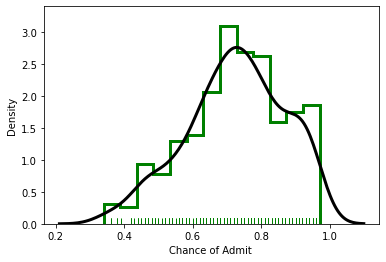

In [50]:
ax = sns.distplot(df1['Chance of Admit '], rug=True, rug_kws={"color": "g"},
                      kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                      hist_kws={"histtype": "step", "linewidth": 3,
                                "alpha": 1, "color": "g"})

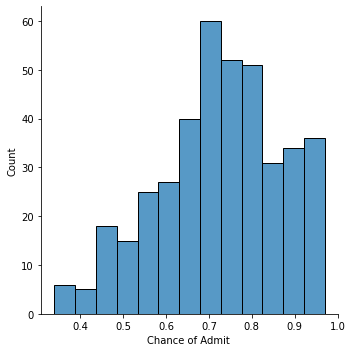

In [51]:
sns.displot(df1['Chance of Admit '])

<AxesSubplot:>

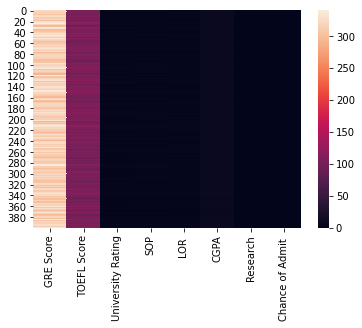

In [53]:

y=sns.heatmap(df1)
y

<AxesSubplot:>

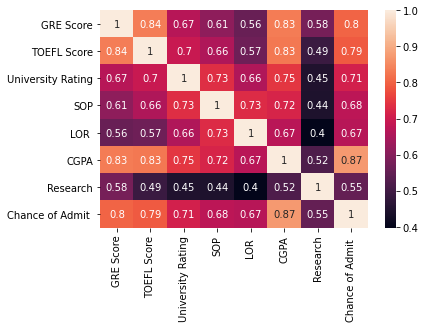

In [54]:
sns.heatmap(df1.corr(), annot=True)

In [79]:
up_df= df1.drop(['TOEFL Score'], axis=1)

<AxesSubplot:>

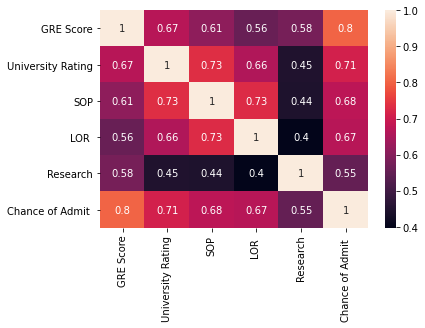

In [65]:
sns.heatmap(y.corr(), annot = True)

<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

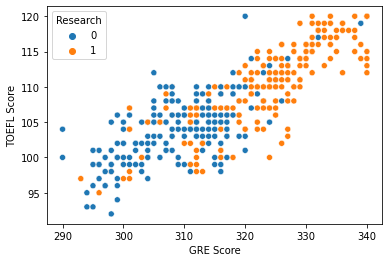

In [83]:
sns.scatterplot(data=df1,x='GRE Score',y='TOEFL Score',hue='Research')

/Users/manju/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

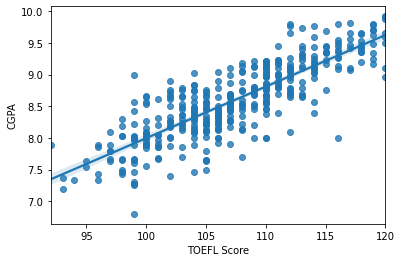

In [66]:
sns.regplot(df1['TOEFL Score'],df1['CGPA'])

In [63]:
# Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [80]:
X= up_df.drop(['Chance of Admit '], axis=1)
y = up_df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions
print(f"Accuracy: {np.round(1-(np.sqrt(mean_squared_error(y_test, predictions))),4)*100} %")

Accuracy: 93.71000000000001 %


In [82]:
model.score(X_train, y_train)

0.7870849996358988

In [84]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,predictions))

r_square score:  0.8344281021195655
